In [19]:
import numpy as np
import matplotlib.pyplot as plt


1000


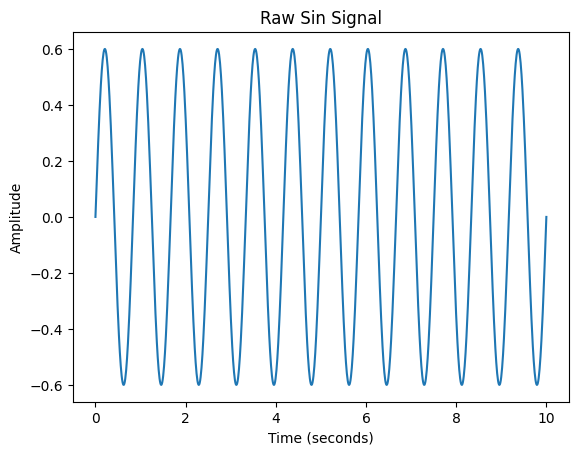

In [20]:
fs = 100
t = np.linspace(0,10,fs*10)
print(len(t))
sin_signal = 0.6*np.sin(2*np.pi*1.2*t)

plt.plot(t,sin_signal)
plt.title('Raw Sin Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()


1000


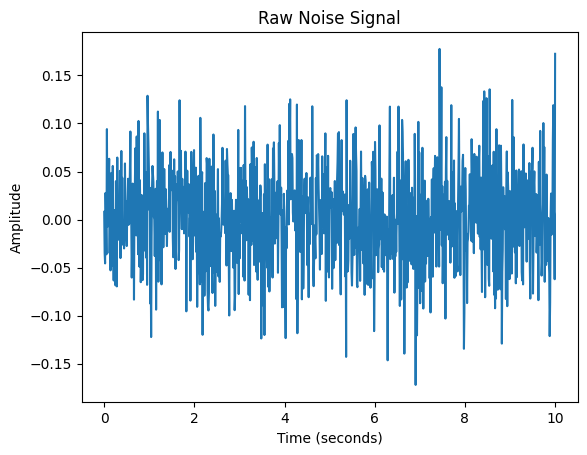

In [21]:
t = np.linspace(0,10,fs*10)
print(len(t))
noise_signal = np.random.normal(0,0.05,len(t))


plt.plot(t,noise_signal)
plt.title('Raw Noise Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()

1000


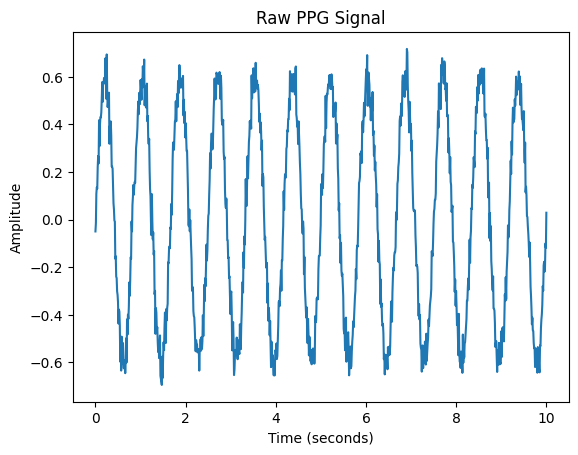

In [22]:
t = np.linspace(0,10,fs*10)
print(len(t))
ppg_signal = 0.6*np.sin(2*np.pi*1.2*t)  + np.random.normal(0,0.05,len(t)) 


plt.plot(t,ppg_signal)
plt.title('Raw PPG Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()

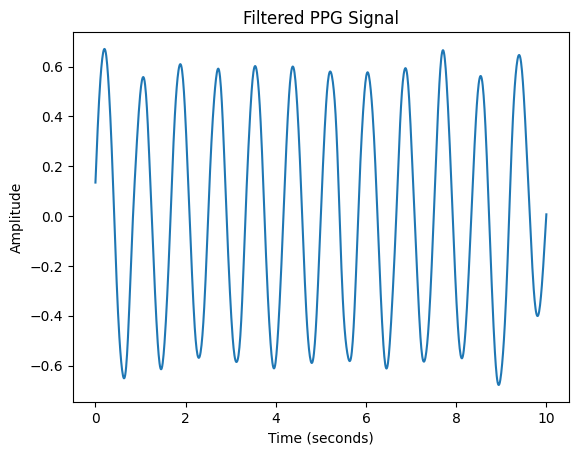

In [23]:
from scipy.signal import butter, filtfilt


def bandpass_filter(signal, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

filtered_ppg = bandpass_filter(ppg_signal,0.5,5,fs)
plt.plot(t,filtered_ppg)
plt.title("Filtered PPG Signal")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()


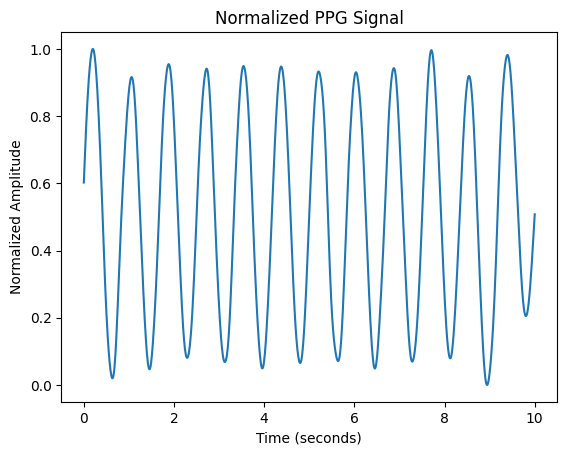

In [27]:
normalized_ppg =  (filtered_ppg - np.min(filtered_ppg)) / (np.max(filtered_ppg) - np.min(filtered_ppg))
plt.plot(t,normalized_ppg)
plt.title("Normalized PPG Signal")
plt.xlabel("Time (seconds)")
plt.ylabel("Normalized Amplitude")
plt.show()

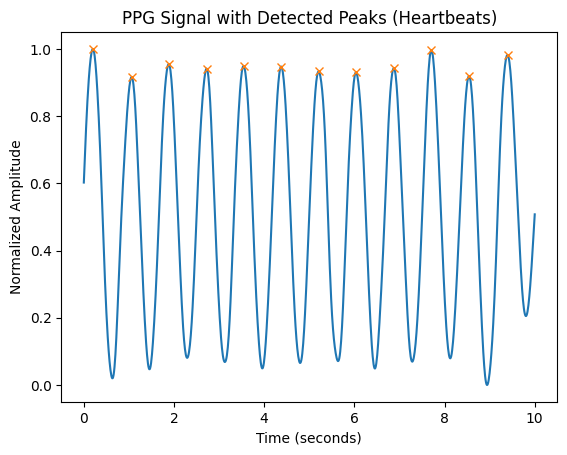

Heart Rate:  71.83447937502159  BPM


In [28]:
from scipy.signal import find_peaks

# Detect peaks in the PPG signal
peaks, _ = find_peaks(normalized_ppg, distance=fs*0.6)  # Minimum distance of 0.6 seconds between peaks (for HR < 100 BPM)

# Calculate Heart Rate (BPM)
ibi = np.diff(peaks) / fs  # Inter-beat interval in seconds
heart_rate = 60 / ibi  # Convert to beats per minute (BPM)

# Plot the PPG signal with detected peaks
plt.plot(t, normalized_ppg)
plt.plot(t[peaks], normalized_ppg[peaks], "x")
plt.title("PPG Signal with Detected Peaks (Heartbeats)")
plt.xlabel("Time (seconds)")
plt.ylabel("Normalized Amplitude")
plt.show()

print("Heart Rate: ", np.mean(heart_rate), " BPM")
